# Exploratory Data Analysis - Terrorism

### Task : Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ 

###    Submitted by : Shweta Jyotiram Gawali


## Import required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

## Load the data

In [4]:
data = pd.read_csv(r'C:\Users\91997\Documents\sparks_foundation_task\globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

C:\Users\91997\AppData\Local\Temp\ipykernel_5728\2559450781.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\91997\Documents\sparks_foundation_task\globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')


In [5]:
# first  5 rows
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Check all column names


In [6]:
pd.set_option("display.max_columns",None)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


## Rename columns

In [8]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state', 'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed', 'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type', 'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True) 
data['Casualities'] = data.Killed + data.Wounded

## Filtering out the important data in whole dataset

pandas.core.frame.DataFrame

In [13]:
new_data = data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Group','Target_type','Weapon_type','Motive','Casualities']]

pandas.core.frame.DataFrame

In [20]:
# final data
new_data.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


## Missing values

In [21]:
new_data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities     16874
dtype: int64

## Number of terrorist activities in each year

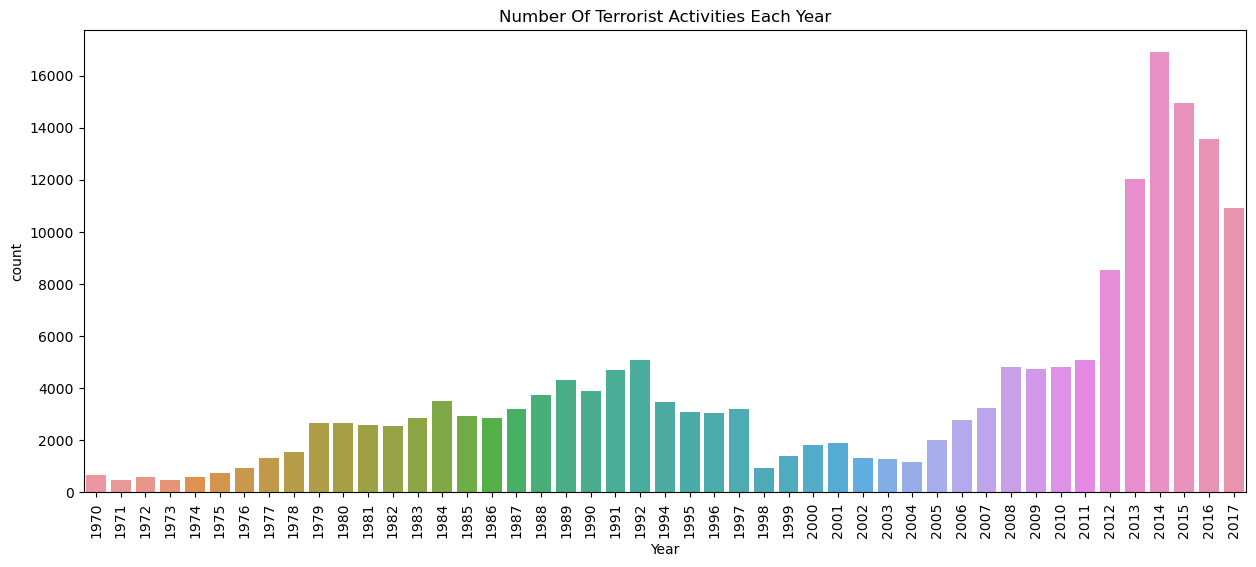

In [15]:
plt.subplots(figsize=(15,6))

sns.countplot(x='Year',data=new_data)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year') 
plt.show()

## Number of Casualities each year

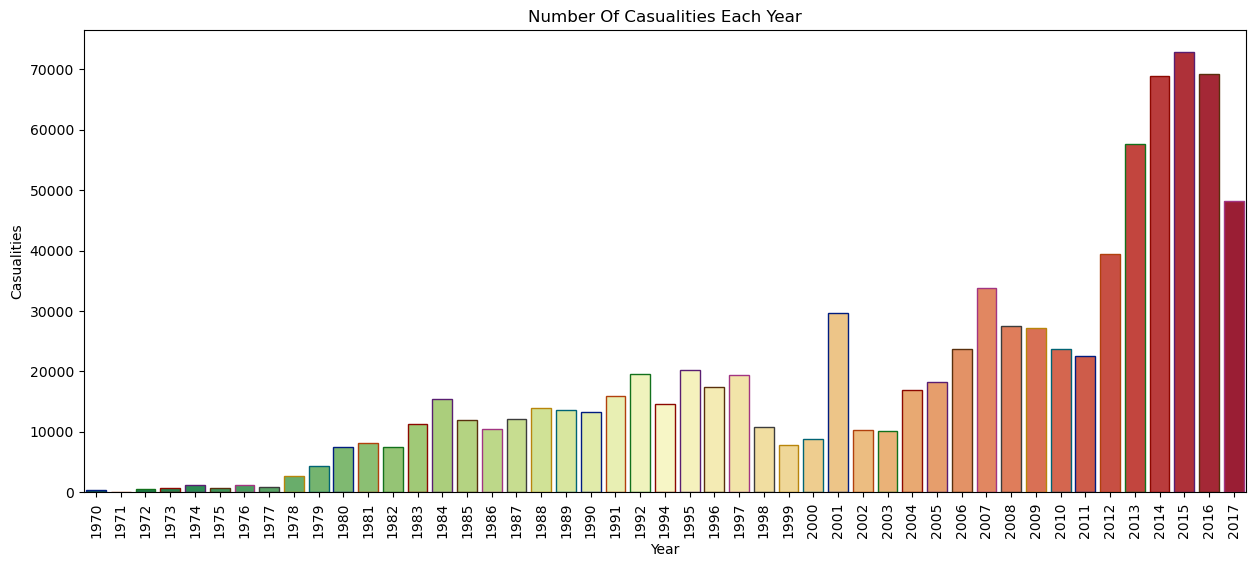

In [23]:

plt.subplots(figsize=(15,6))
year_cas = new_data.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities'] 
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10)) 
plt.xticks(rotation=90) 
plt.title('Number Of Casualities Each Year') 
plt.show()

## Number of total attacks in each country

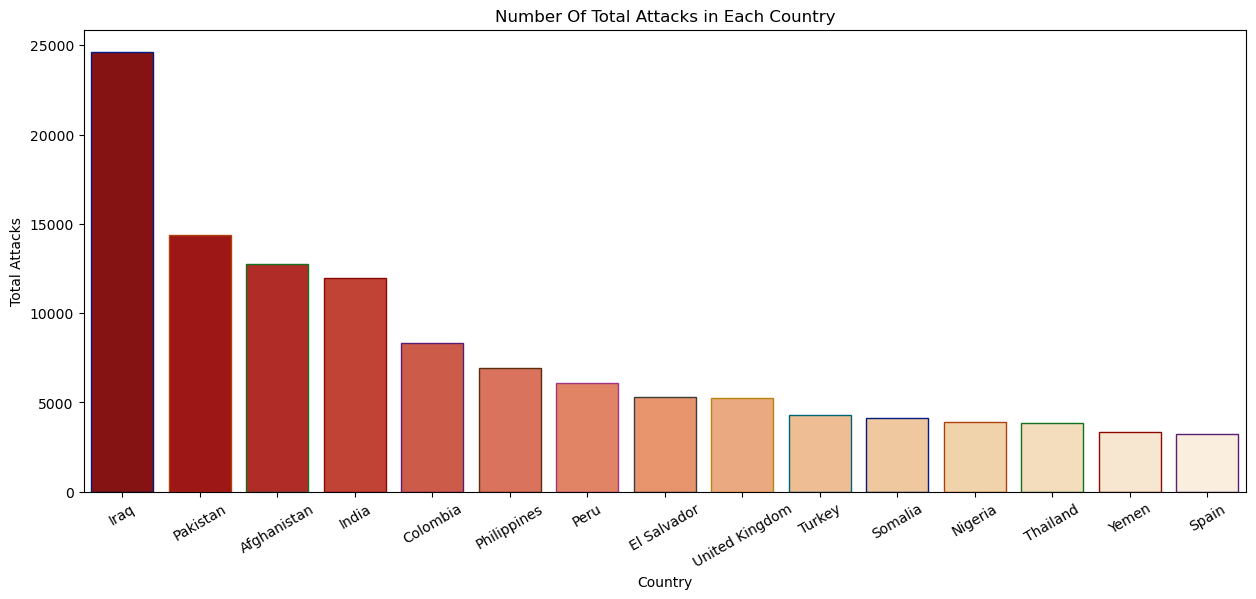

In [25]:
plt.subplots(figsize=(15,6)) 
country_attacks = new_data.Country.value_counts()[:15].reset_index() 
country_attacks.columns = ['Country', 'Total Attacks'] 
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10)) 
plt.xticks(rotation=30) 
plt.title('Number Of Total Attacks in Each Country') 
plt.show()

## Top Countries Affected

In [31]:
plt.subplots(figsize=(15,6)) 
sns.barplot(new_data['Country'].value_counts([:15].index,data['Country'].value counts()[:15].values,palette='mako') 
plt.title('Top Countries Affected') 
plt.xlabel('Countries') 
plt.ylabel('Count') 
plt.xticks(rotation= 90) 
plt.show()

SyntaxError: invalid syntax (4272942743.py, line 2)

## Number of total casualities in each country

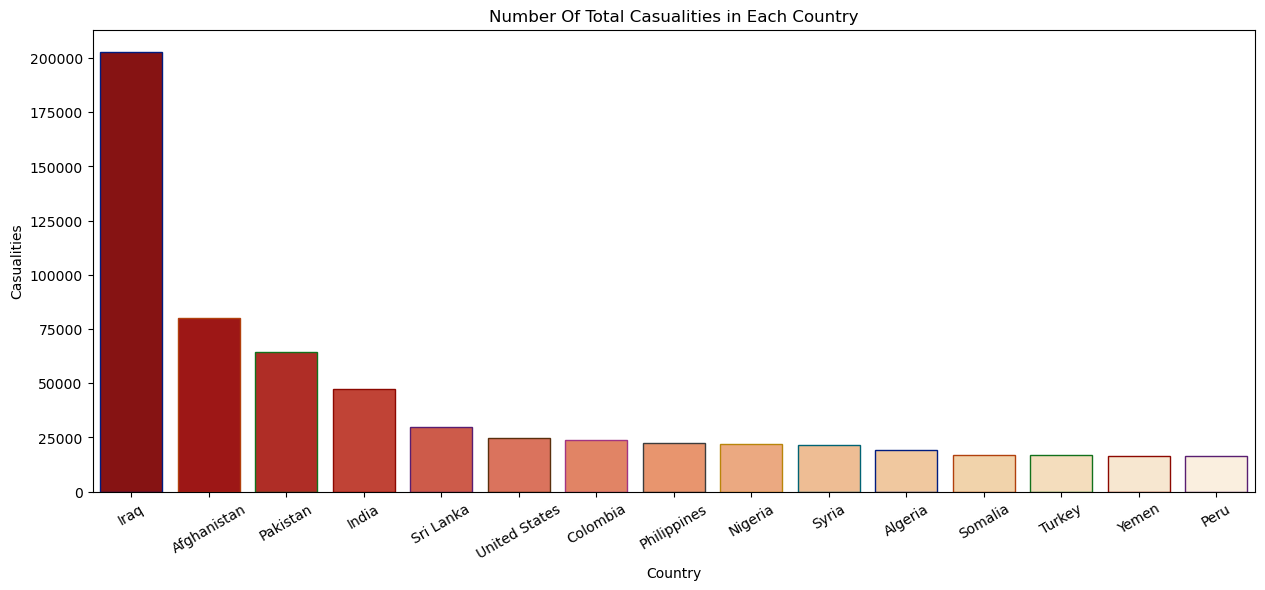

In [34]:
plt.subplots(figsize=(15,6)) 
count_cas = data.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15] 
sns.barplot(x=count_cas.Country, y=count_cas.Casualities, palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10)) 
plt.xticks(rotation=30) 
plt.title('Number Of Total Casualities in Each Country') 
plt.show()

## Number of total attacks in each region

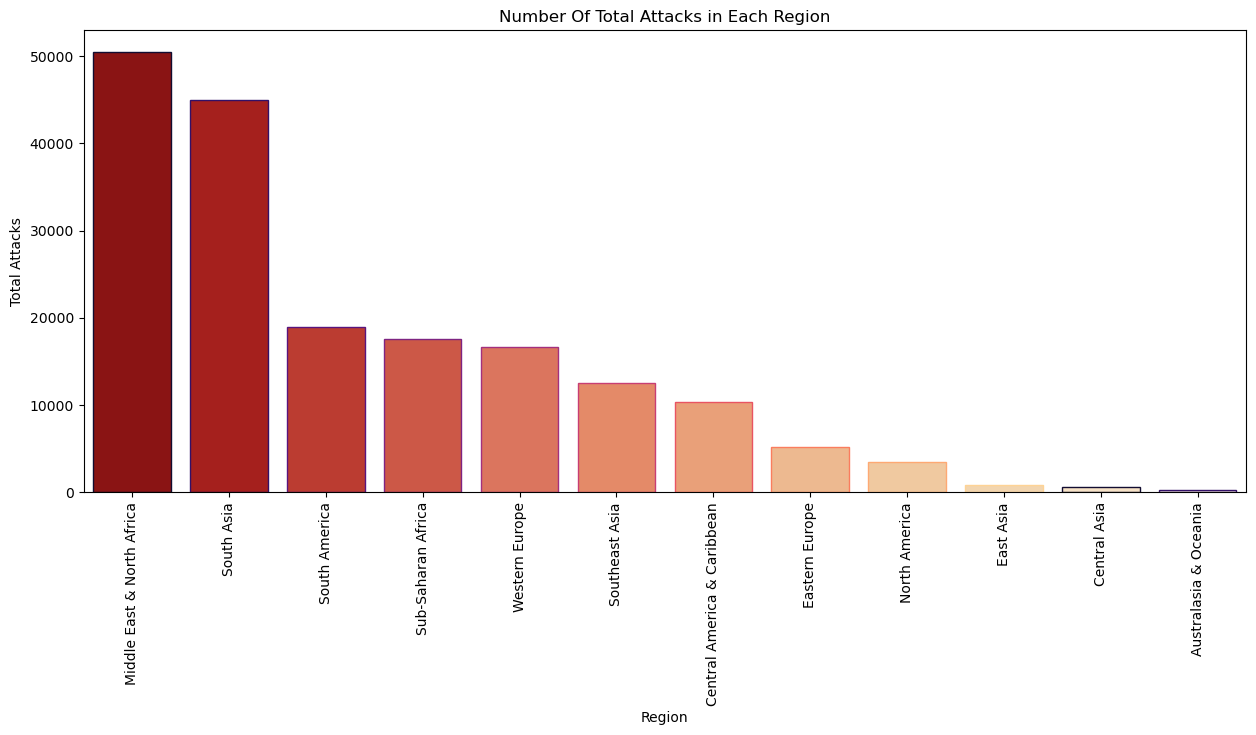

In [35]:
region_attacks = data.Region.value_counts().to_frame().reset_index() 
region_attacks.columns = ['Region', 'Total Attacks'] 
plt.subplots(figsize=(15,6)) 
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='OrRd_r', edgecolor=sns.color_palette('magma',10)) 
plt.xticks(rotation=90) 
plt.title('Number Of Total Attacks in Each Region') 
plt.show()

## Number of total attacks by attack type

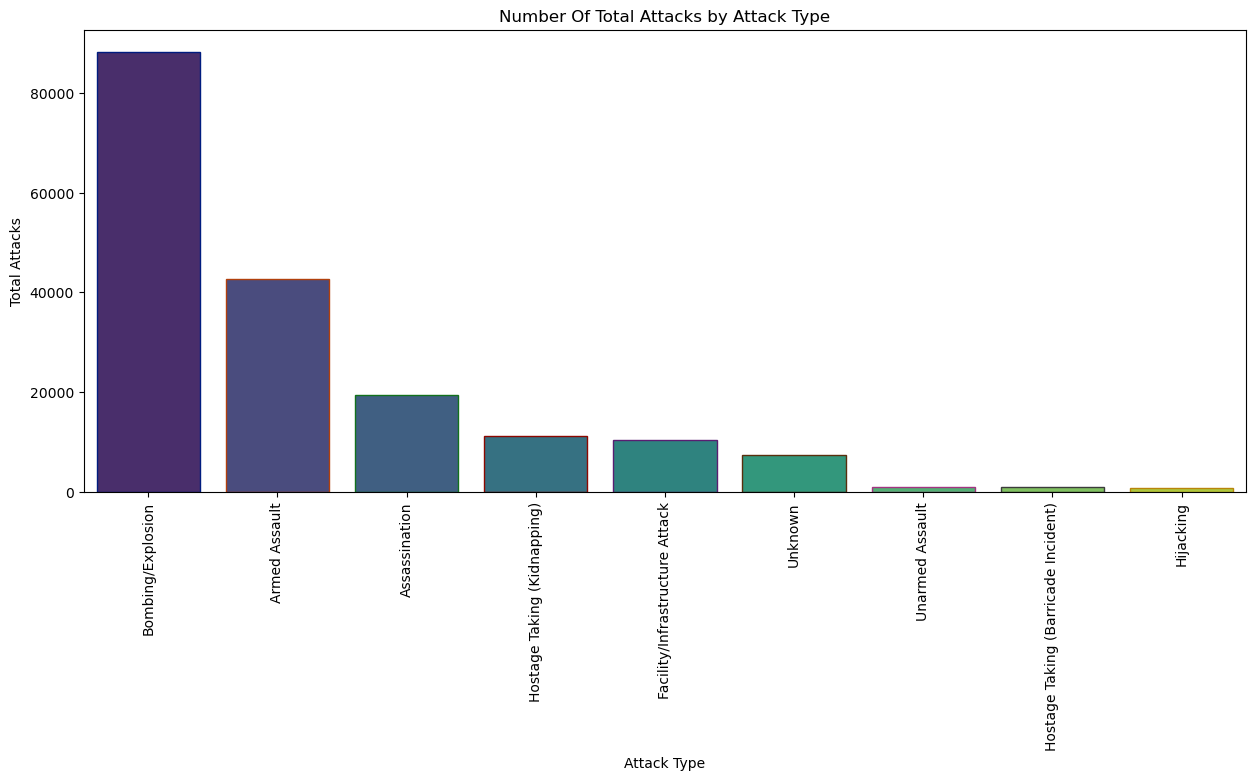

In [36]:
attack_type = data.AttackType.value_counts().to_frame().reset_index() 
attack_type.columns = ['Attack Type', 'Total Attacks'] 
plt.subplots(figsize=(15,6)) 
sns.barplot(x=attack_type['Attack Type'], y=attack_type['Total Attacks'], palette='viridis', edgecolor=sns.color_palette('dark', 10)) 
plt.xticks(rotation=90) 
plt.title('Number Of Total Attacks by Attack Type') 
plt.show()

## Number of total attacks and casualities by city

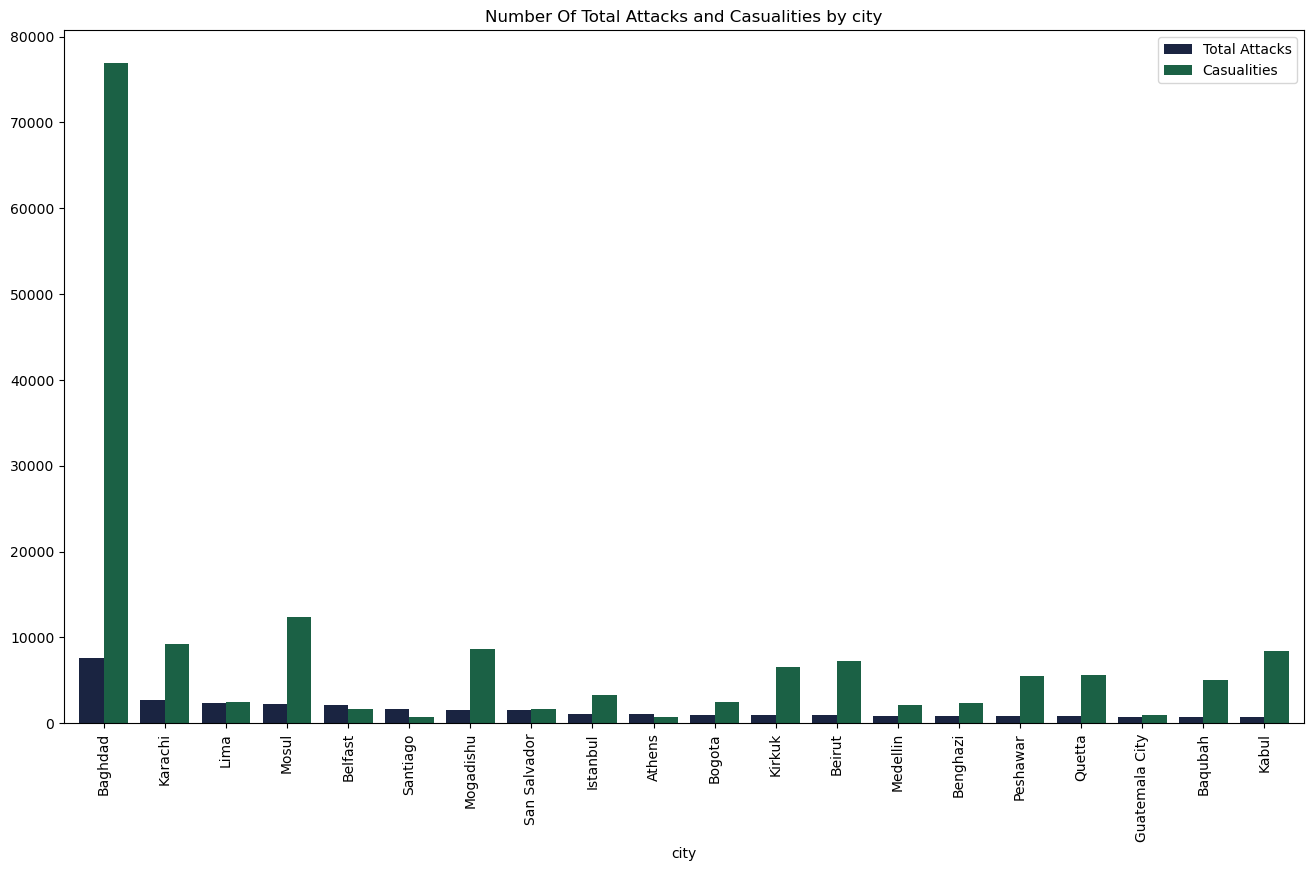

In [39]:
city_attacks = data.city.value_counts().to_frame().reset_index() 
city_attacks.columns = ['city', 'Total Attacks'] 
city_cas = data.groupby('city').Casualities.sum().to_frame().reset_index() 
city_cas.columns = ['city', 'Casualities'] 
city_tot = pd.merge(city_attacks, city_cas, how='left', on='city').sort_values('Total Attacks', ascending=False)[1:21] 
sns.set_palette('cubehelix') 
city_tot.plot.bar(x='city', width=0.8) 
plt.xticks(rotation=90) 
plt.title('Number Of Total Attacks and Casualities by city') 
fig = plt.gcf() 
fig.set_size_inches(16,9) 
plt.show()

In [41]:
group_attacks = data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16] 
group_attacks.columns = ['Terrorist Group', 'Total Attacks'] 
group_attacks

,Terrorist Group,Total Attacks
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


## Total Number of people killed in terror attack

In [44]:
killData = data.loc[:,'Killed'] 
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


## Attackdata

In [45]:
attackData = data.loc[:,'AttackType'] 
typeKillData = pd.concat([attackData, killData], axis=1) 
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum') 
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


## Countrydata

In [47]:

countryData = data.loc[:,'Country'] 
countryKillData = pd.concat([countryData, killData], axis=1) 
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum') 
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Czechoslovakia,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Falkland Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macau,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Martinique,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Caledonia,New Hebrides,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Yemen,Norway,Pakistan,Panama,Papua New Guinea,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Rhodesia,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Serbia-Montenegro,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,258.0,1.0,44.0,1244.0,76.0,14.0,79.0,3.0,0.0,9.0,42.0,79.0,11.0,203.0,0.0,28.0,134.0,4205.0,543.0,2347.0,365.0,1990.0,1119.0,228.0,1008.0,14698.0,1.0,17.0,248.0,8.0,45.0,6.0,27.0,4069.0,5.0,274.0,3.0,34.0,2.0,9.0,54.0,3869.0,12053.0,2.0,46.0,3.0,1765.0,0.0,8.0,11.0,534.0,1.0,0.0,6.0,13.0,278.0,84.0,19.0,325.0,9.0,8.0,5167.0,213.0,17.0,41.0,336.0,307.0,4.0,6.0,0.0,19341.0,1238.0,1.0,1673.0,78589.0,117.0,1703.0,420.0,268.0,42.0,66.0,133.0,39.0,1948.0,83.0,63.0,10.0,27.0,2.0,4061.0,46.0,177.0,2598.0,1.0,0.0,1.0,49.0,31.0,33.0,152.0,20.0,1432.0,5.0,0.0,43.0,0.0,780.0,13.0,1.0,292.0,2711.0,1280.0,220.0,1969.0,37.0,35.0,0.0,1.0,10598.0,1474.0,22682.0,3.0,3.0,79.0,23822.0,38.0,79.0,59.0,15.0,12771.0,9559.0,9.0,32.0,7.0,182.0,217.0,4.0,4308.0,3236.0,672.0,325.0,3.0,3.0,0.0,840.0,5.0,7.0,1.0,4.0,10273.0,2674.0,10.0,2634.0,81.0,0.0,96.0,1288.0,15530.0,0.0,2.0,3883.0,29.0,6.0,22.0,74.0,15229.0,60.0,307.0,73.0,2742.0,76.0,6.0,351.0,6888.0,3.0,3065.0,2261.0,123.0,3410.0,3771.0,6.0,68.0,0.0,0.0,227.0,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


## Number of people killed by countries

In [48]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0]=25 
fig_size[1]=25 
plt.rcParams["figure.figsize"] = fig_size

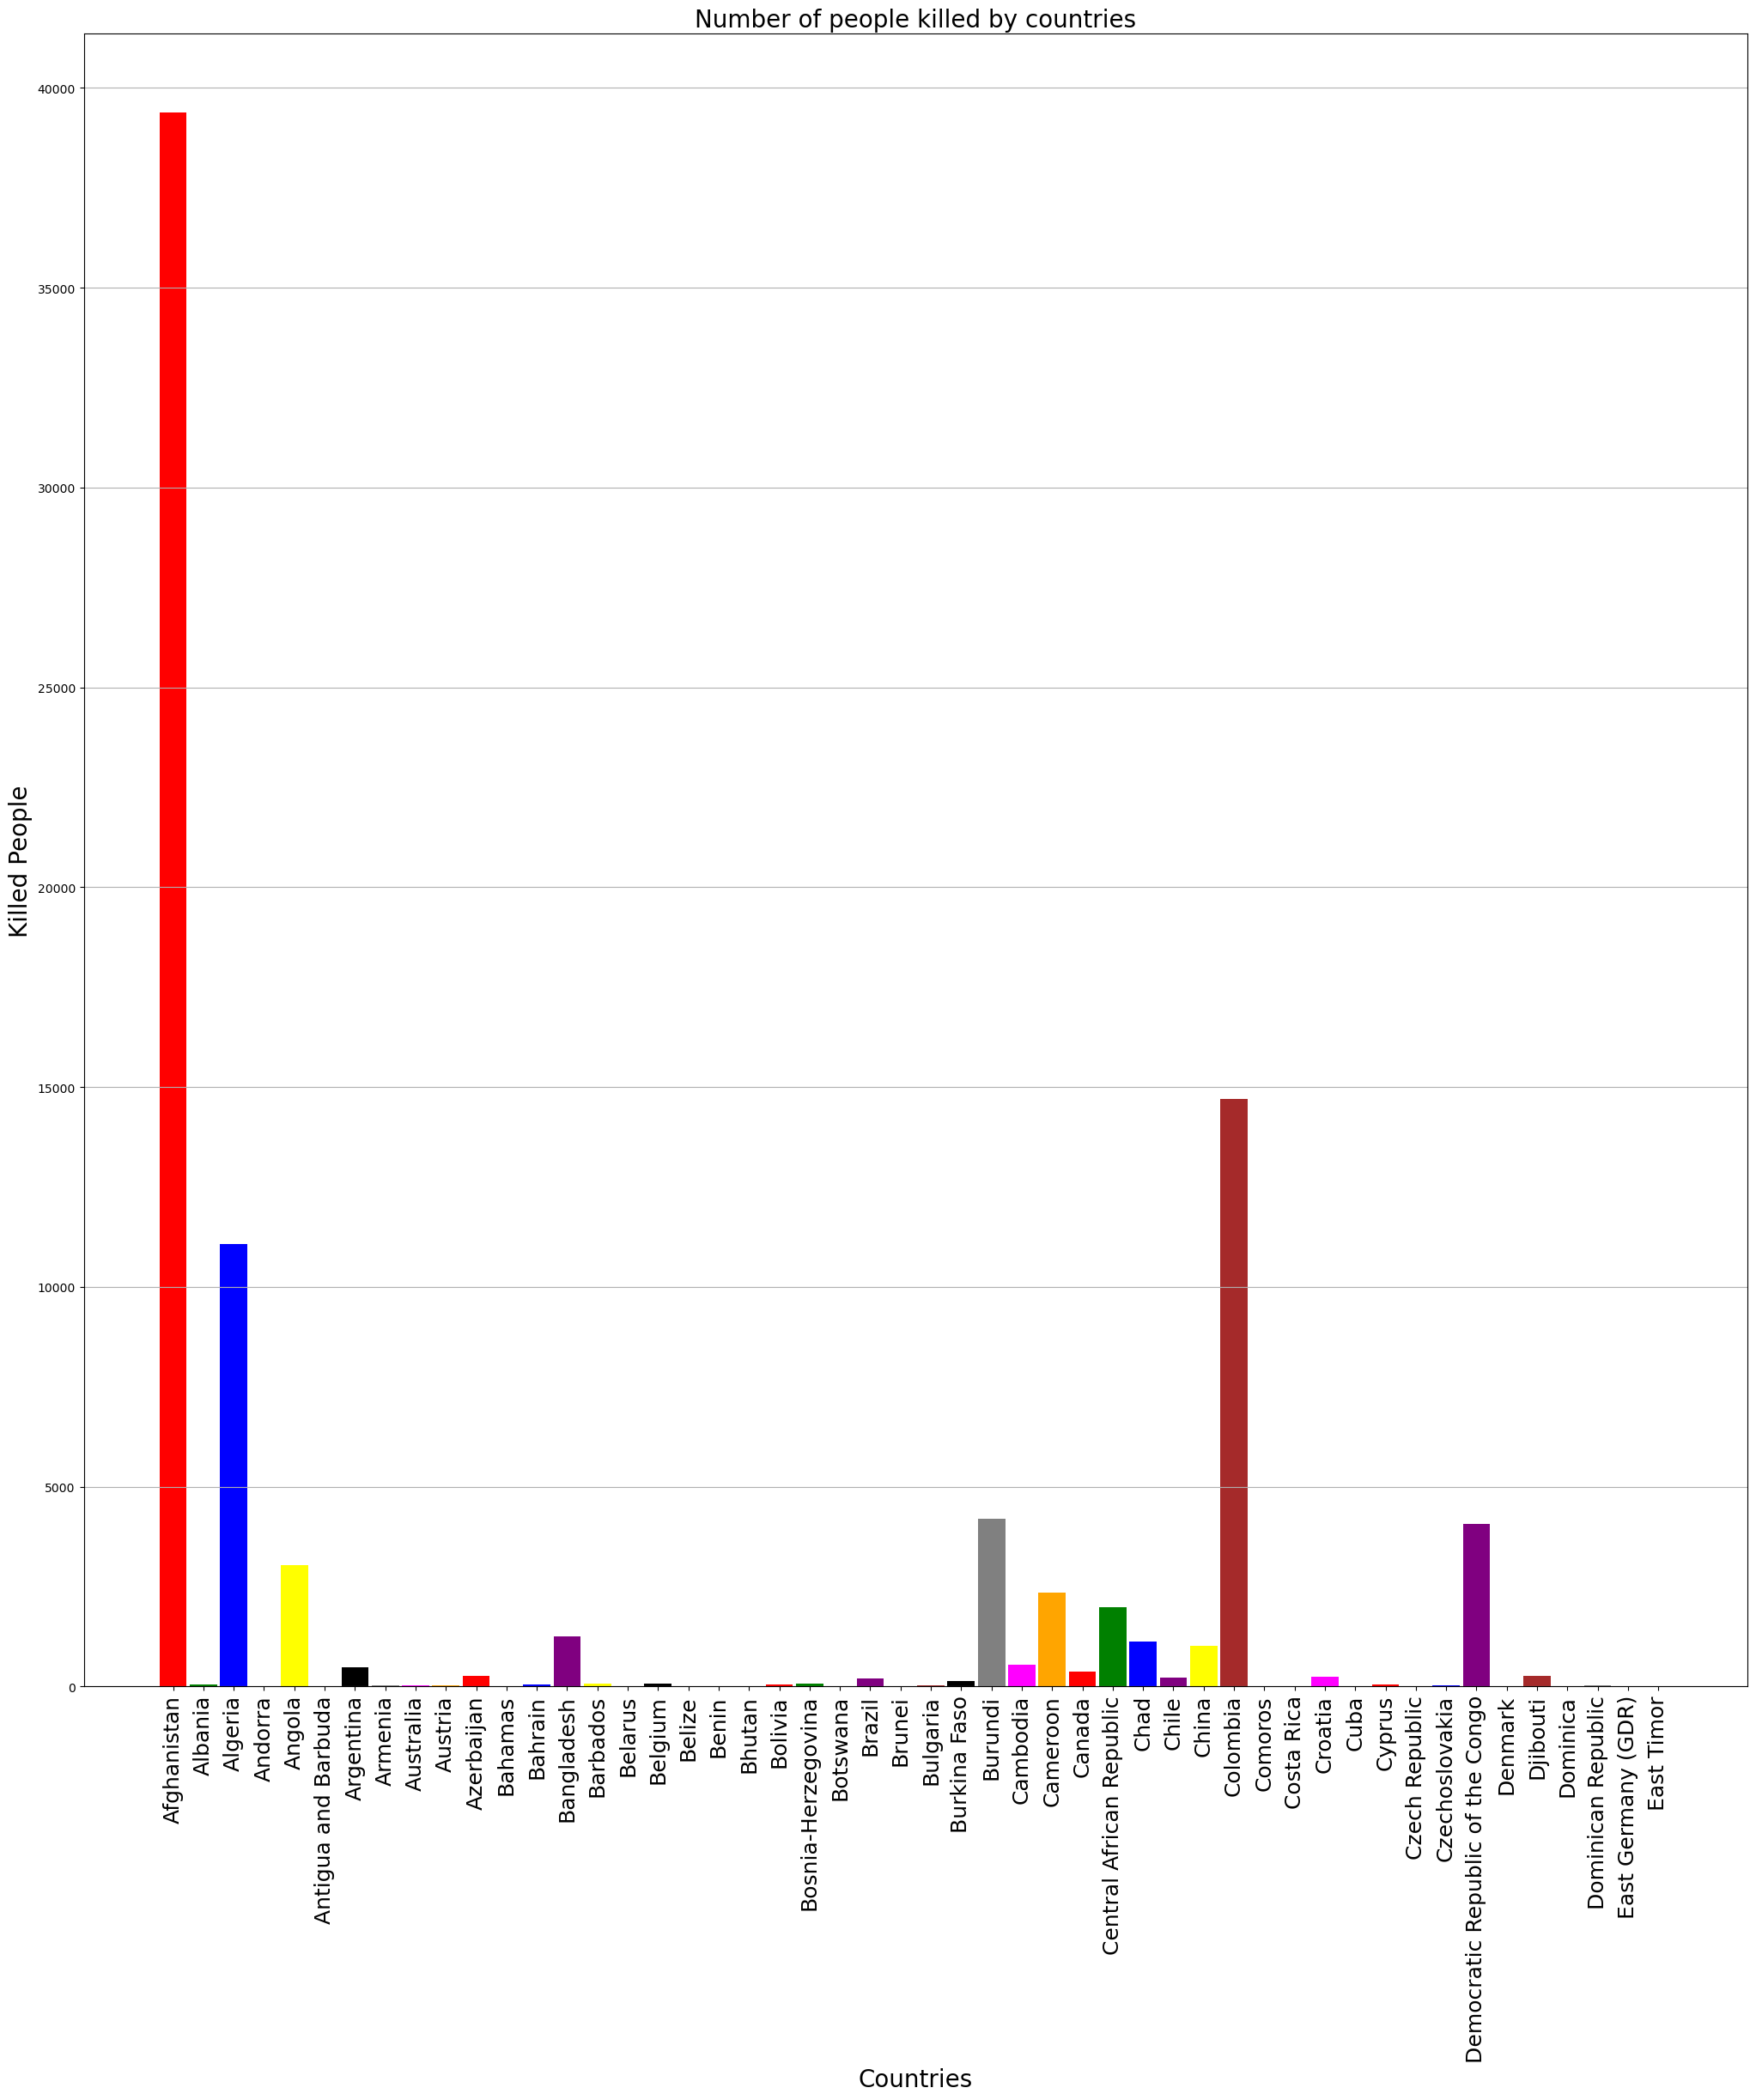

In [55]:
labels = countryKillFormatData.columns.tolist() 
labels = labels[:50] 
index = np.arange(len(labels)) 
transpoze = countryKillFormatData.T 
values = transpoze.values.tolist() 
values = values[:50] 
values = [int(i[0]) for i in values] 
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] 
fig, ax = plt.subplots(1, 1) 
ax.yaxis.grid(True) 
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0]=25 
fig_size[1]=25 
plt.rcParams["figure.figsize"] = fig_size 
plt.bar(index, values, color = colors, width = 0.9) 
plt.ylabel('Killed People', fontsize=20) 
plt.xlabel('Countries', fontsize = 20) 
plt.xticks(index, labels, fontsize=18, rotation=90) 
plt.title('Number of people killed by countries', fontsize = 20) 
plt.show()